In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Series

In [10]:
sr = pd.Series([1,5,8])
sr

0    1
1    5
2    8
dtype: int64

In [11]:
sr.index

RangeIndex(start=0, stop=3, step=1)

In [13]:
sr.shape

(3,)

In [15]:
dic = {'Casa':200,'Carro':50,'Ropa':20}
sr = pd.Series(dic)
sr

Casa     200
Carro     50
Ropa      20
dtype: int64

In [16]:
sr = pd.Series(dic,index=['Casa','Carro','Comida'])
sr

Casa      200.0
Carro      50.0
Comida      NaN
dtype: float64

In [17]:
sr[sr.notnull()]

Casa     200.0
Carro     50.0
dtype: float64

In [18]:
sr.isnull().any()

True

In [19]:
pd.__version__

'1.1.3'

# Data Frames

In [21]:
dict_data = {
    'edad': [10,9,13,14,12,11,12],
    'cm': [115,110,130,155,125,120,125],
    'pais':['co','mx','co','mx','mx','ch','ch'],
    'genero':['M','F','F','M','M','M','F'],
    'Q1':[5,10,8,np.nan,7,8,3],
    'Q2':[7,9,9,8,8,8,9]
}

In [22]:
df = pd.DataFrame(dict_data)
df

,edad,cm,pais,genero,Q1,Q2
0,10,115,co,M,5.0,7
1,9,110,mx,F,10.0,9
2,13,130,co,F,8.0,9
3,14,155,mx,M,NaN,8
4,12,125,mx,M,7.0,8
5,11,120,ch,M,8.0,8
6,12,125,ch,F,3.0,9


In [24]:
df.values

array([[10, 115, 'co', 'M', 5.0, 7],
       [9, 110, 'mx', 'F', 10.0, 9],
       [13, 130, 'co', 'F', 8.0, 9],
       [14, 155, 'mx', 'M', nan, 8],
       [12, 125, 'mx', 'M', 7.0, 8],
       [11, 120, 'ch', 'M', 8.0, 8],
       [12, 125, 'ch', 'F', 3.0, 9]], dtype=object)

In [26]:
df[['edad','cm','genero']]

,edad,cm,genero
0,10,115,M
1,9,110,F
2,13,130,F
3,14,155,M
4,12,125,M
5,11,120,M
6,12,125,F


In [28]:
df.loc[1,['edad','cm','genero']]

edad        9
cm        110
genero      F
Name: 1, dtype: object

In [31]:
df.iloc[1:4,:]

,edad,cm,pais,genero,Q1,Q2
1,9,110,mx,F,10.0,9
2,13,130,co,F,8.0,9
3,14,155,mx,M,NaN,8


# Filatardo 

In [51]:
df[df['Q1'] >= df['Q2']]

,edad,cm,pais,genero,Q1,Q2
1,9,110,mx,F,10.0,9
5,11,120,ch,M,8.0,8


In [52]:
df.query('Q1 > 2')

,edad,cm,pais,genero,Q1,Q2
0,10,115,co,M,5.0,7
1,9,110,mx,F,10.0,9
2,13,130,co,F,8.0,9
4,12,125,mx,M,7.0,8
5,11,120,ch,M,8.0,8
6,12,125,ch,F,3.0,9


In [68]:
df[(df['edad'] > 8 ) & (df['pais'] == "mx")]

,edad,cm,pais,genero,Q1,Q2
1,9,110,mx,F,10.0,9
3,14,155,mx,M,NaN,8
4,12,125,mx,M,7.0,8


In [69]:
df.query('edad > 8 and pais == "mx"')

,edad,cm,pais,genero,Q1,Q2
1,9,110,mx,F,10.0,9
3,14,155,mx,M,NaN,8
4,12,125,mx,M,7.0,8


In [55]:
df

,edad,cm,pais,genero,Q1,Q2
0,10,115,co,M,5.0,7
1,9,110,mx,F,10.0,9
2,13,130,co,F,8.0,9
3,14,155,mx,M,NaN,8
4,12,125,mx,M,7.0,8
5,11,120,ch,M,8.0,8
6,12,125,ch,F,3.0,9


In [56]:
df['edad'].unique()

array([10,  9, 13, 14, 12, 11])

In [60]:
df['edad'].value_counts()

12    2
14    1
13    1
11    1
10    1
9     1
Name: edad, dtype: int64

In [78]:
!ls

bases.ipynb  test.csv  Untitled.ipynb


In [81]:
df.to_csv('test.csv',index = False)

In [82]:
pd.read_csv('test.csv')

,edad,cm,pais,genero,Q1,Q2
0,10,115,co,M,5.0,7
1,9,110,mx,F,10.0,9
2,13,130,co,F,8.0,9
3,14,155,mx,M,NaN,8
4,12,125,mx,M,7.0,8
5,11,120,ch,M,8.0,8
6,12,125,ch,F,3.0,9


# Extraer datos de PostgresSQL

In [1]:
import psycopg2

In [2]:
conn_sql = psycopg2.connect(user = "postgres",
                            password = "Cesar20022007#",
                            host = "127.0.0.1",
                            port = "5432",
                            database = "prueba")

In [8]:
query_sql = '''
select *
from platzi.alumnos
limit 10
'''

In [11]:
df = pd.read_sql(query_sql, conn_sql)
df.head(5)

,id,nombre,apellido,email,colegiatura,fecha_incorporacion,carrera_id,tutor_id
0,1,Wanda,Billington,wbillington0@nsw.gov.au,5000.0,2020-05-17 22:49:29,23,9
1,2,Blayne,Wakeley,bwakeley1@google.cn,2500.0,2018-09-01 17:51:49,40,26
2,3,Hilde,Matiewe,hmatiewe2@hibu.com,2300.0,2020-07-18 00:03:21,48,25
3,4,Leanna,None,ldusey3@ebay.co.uk,2000.0,2018-02-05 17:28:38,36,14
4,5,Maire,Garnall,mgarnall4@artisteer.com,4800.0,2020-08-04 03:43:57,14,7


# Extraer datos de MySQL

In [38]:
from sqlalchemy import create_engine
import pymysql

In [39]:
pymysql.install_as_MySQLdb()

In [29]:
database_type = 'mysql'

In [40]:
database_type = 'mysql'
user = 'root'
password = 'Cesar20022007#'
host = 'localhost'
database = 'pruebaplatzi'

conn_string = '{}://{}:{}@{}/{}'.format(database_type, user, password, host, database)

sql_conn = sql.create_engine(conn_string)

In [46]:
query_sql = '''
select *
from books
limit 10
'''

In [47]:
df = pd.read_sql(query_sql,sql_conn)

In [50]:
df.head()

,book_id,author_id,title,year,language,cover_url,price,sellable,copies,description
0,1,1,The Startup Playbook,2013,en,None,10.0,1,5,Advice from the experts
1,2,1,The Startup Playbook,2014,es,None,10.0,1,5,"Consejo de los expertos, traducido por Platzi"
2,3,3,Estudio en escarlata,1887,es,None,5.0,1,10,La primera novela de Sherlock Holmes
3,4,6,Wallander: Asesinos sin rostro,1991,es,None,15.0,1,3,
4,5,6,Wallander: Los perros de Riga,1992,es,None,15.0,1,3,


# Manejo de bases de datos

In [122]:
df_metorites = pd.read_csv('Meteorite_Landings.csv')

In [123]:
df_metorites.sample(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
8471,Dominion Range 08026,52991,Valid,LL6,222.5,Found,01/01/2008 12:00:00 AM,0.0,0.0,"(0.0, 0.0)"
15539,Grove Mountains 053211,48418,Valid,H6,1.4,Found,01/01/2006 12:00:00 AM,-72.8,75.3,"(-72.774722, 75.34)"
13826,Grove Mountains 021500,46746,Valid,L5,12.8,Found,01/01/2003 12:00:00 AM,-72.9,75.3,"(-72.94917, 75.2925)"
45027,Yamato 983268,39890,Valid,H4,11.4,Found,01/01/1998 12:00:00 AM,0.0,0.0,"(0.0, 0.0)"
7665,Dhofar 280,7063,Valid,Lunar (anorth),251.2,Found,01/01/2001 12:00:00 AM,19.3,54.8,"(19.32667, 54.78333)"
5284,Caleta el Cobre 001,54446,Valid,H6,9.0,Found,01/01/2010 12:00:00 AM,-24.3,-70.0,"(-24.266, -70.03333)"
10579,Elephant Moraine 90564,8973,Valid,L6,27.2,Found,01/01/1990 12:00:00 AM,-76.3,156.4,"(-76.28217, 156.4466)"
16315,Hammadah al Hamra 338,35517,Valid,H5,752.5,Found,01/01/2003 12:00:00 AM,30.5,13.6,"(30.545, 13.58194)"
373,Heredia,11875,Valid,H5,"1,000.0",Fell,01/01/1857 12:00:00 AM,10.0,-84.1,"(10.0, -84.1)"
30263,Northwest Africa 7115,54782,Valid,H4,10.7,Found,01/01/2011 12:00:00 AM,0.0,0.0,"(0.0, 0.0)"


In [124]:
pd.options.display.float_format = '{:,.1f}'.format

In [125]:
df_metorites.describe()

,id,mass (g),reclat,reclong
count,"45,716.0","45,585.0","38,401.0","38,401.0"
mean,"26,889.7","13,278.1",-39.1,61.1
std,"16,860.7","574,988.9",46.4,80.6
min,1.0,0.0,-87.4,-165.4
25%,"12,688.8",7.2,-76.7,0.0
50%,"24,261.5",32.6,-71.5,35.7
75%,"40,656.8",202.6,0.0,157.2
max,"57,458.0","60,000,000.0",81.2,354.5


In [126]:
df_metorites.describe(include='all')

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
count,45716,"45,716.0",45716,45716,"45,585.0",45716,45425,"38,401.0","38,401.0",38401
unique,45716,nan,2,466,nan,2,266,nan,nan,17100
top,Yamato 82123,nan,Valid,L6,nan,Found,01/01/2003 12:00:00 AM,nan,nan,"(0.0, 0.0)"
freq,1,nan,45641,8285,nan,44609,3323,nan,nan,6214
mean,NaN,"26,889.7",NaN,NaN,"13,278.1",NaN,NaN,-39.1,61.1,NaN
std,NaN,"16,860.7",NaN,NaN,"574,988.9",NaN,NaN,46.4,80.6,NaN
min,NaN,1.0,NaN,NaN,0.0,NaN,NaN,-87.4,-165.4,NaN
25%,NaN,"12,688.8",NaN,NaN,7.2,NaN,NaN,-76.7,0.0,NaN
50%,NaN,"24,261.5",NaN,NaN,32.6,NaN,NaN,-71.5,35.7,NaN
75%,NaN,"40,656.8",NaN,NaN,202.6,NaN,NaN,0.0,157.2,NaN


In [127]:
df_metorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


In [128]:
df_metorites.convert_dtypes().dtypes

name            string
id               Int64
nametype        string
recclass        string
mass (g)       float64
fall            string
year            string
reclat         float64
reclong        float64
GeoLocation     string
dtype: object

In [129]:
df_metorites.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year            object
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [130]:
df_metorites[['fall','nametype']]=df_metorites[['fall','nametype']].astype('category')

In [131]:
df_metorites['fall'].unique()

['Fell', 'Found']
Categories (2, object): ['Fell', 'Found']

In [132]:
df_metorites['fall'].value_counts()

Found    44609
Fell      1107
Name: fall, dtype: int64

In [133]:
pd.get_dummies(df_metorites['fall'])

,Fell,Found
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
45711,0,1
45712,0,1
45713,0,1
45714,0,1


In [134]:
df_metorites['year']= pd.to_datetime(
    df_metorites['year'],
    errors = 'coerce',
    format ='%m/%d/%Y %H:%M:%S %p'
)


In [135]:
df_metorites.dtypes

name                   object
id                      int64
nametype             category
recclass               object
mass (g)              float64
fall                 category
year           datetime64[ns]
reclat                float64
reclong               float64
GeoLocation            object
dtype: object

In [136]:
df_metorites.rename(columns={'mass (g)':'mass'},inplace=True)

# Borrar

In [138]:
df_metorites['mass'].head(5).index

RangeIndex(start=0, stop=5, step=1)

In [164]:
df2 = df_metorites.dropna()

In [165]:
df2['mass'].isna().value_counts()

False    38101
Name: mass, dtype: int64

In [166]:
df_metorites.dropna(subset=['mass'],inplace=True)

In [168]:
df_metorites['mass'].isna().value_counts()

False    45585
Name: mass, dtype: int64

# Operaciones matemáticas

In [172]:
df_lmerged = pd.read_csv('london_merged.csv',parse_dates=['timestamp'])

In [173]:
df_lmerged.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [180]:
df_lmerged['hour'] = df_lmerged['timestamp'].dt.hour
df_lmerged['hour']

0         0
1         1
2         2
3         3
4         4
         ..
17409    19
17410    20
17411    21
17412    22
17413    23
Name: hour, Length: 17414, dtype: int64

In [185]:
df = df_lmerged.iloc[:,1:]   # No tomar en cuenta los valores tipos datetime, y tener solo valores numericos 
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4
...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,19
17410,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,20
17411,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,21
17412,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,22


In [188]:
df['hum']**2

0        8,649.0
1        8,649.0
2        9,312.2
3       10,000.0
4        8,649.0
          ...   
17409    6,561.0
17410    6,561.0
17411    6,162.2
17412    5,776.0
17413    5,776.0
Name: hum, Length: 17414, dtype: float64

Sumar dos columnas 

In [194]:
df['t2'] + df['hum']

0        95.0
1        95.5
2        99.0
3       102.0
4        93.0
         ... 
17409    82.0
17410    82.0
17411    80.0
17412    77.5
17413    77.0
Length: 17414, dtype: float64

Sacar la norma de la columna t2 por ella misma

In [187]:
np.sqrt(df['t2'].dot(df['t2']))

1753.0971244565367

Funciones

In [196]:
df['t2'].apply(lambda x: x + 2)

0       4.0
1       4.5
2       4.5
3       4.0
4       2.0
         ..
17409   3.0
17410   3.0
17411   3.5
17412   3.5
17413   3.0
Name: t2, Length: 17414, dtype: float64

In [198]:
def funcion_1(x,a=20,b=5):
    return x + (a ** b)

In [199]:
df['t2'].apply(funcion_1 , args=(20,2))

0       402.0
1       402.5
2       402.5
3       402.0
4       400.0
         ... 
17409   401.0
17410   401.0
17411   401.5
17412   401.5
17413   401.0
Name: t2, Length: 17414, dtype: float64

Aplicar una función a todas las columnas 

In [200]:
df.apply(lambda x:x.mean())

cnt            1,143.1
t1                12.5
t2                11.5
hum               72.3
wind_speed        15.9
weather_code       2.7
is_holiday         0.0
is_weekend         0.3
season             1.5
hour              11.5
dtype: float64

Para específicar que eje usar se usa axis=

In [201]:
df.apply(lambda x:x.mean(),axis=1)

0        29.3
1        24.8
2        24.2
3        18.4
4        15.8
         ... 
17409   117.3
17410    67.6
17411    47.5
17412    35.9
17413    27.1
Length: 17414, dtype: float64

Aplicar la función a toda la data

In [202]:
df.applymap(lambda x: x+1)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour
0,183,4.0,3.0,94.0,7.0,4.0,1.0,2.0,4.0,1
1,139,4.0,3.5,94.0,6.0,2.0,1.0,2.0,4.0,2
2,135,3.5,3.5,97.5,1.0,2.0,1.0,2.0,4.0,3
3,73,3.0,3.0,101.0,1.0,2.0,1.0,2.0,4.0,4
4,48,3.0,1.0,94.0,7.5,2.0,1.0,2.0,4.0,5
...,...,...,...,...,...,...,...,...,...,...
17409,1043,6.0,2.0,82.0,20.0,4.0,1.0,1.0,4.0,20
17410,542,6.0,2.0,82.0,22.0,5.0,1.0,1.0,4.0,21
17411,338,6.5,2.5,79.5,25.0,5.0,1.0,1.0,4.0,22
17412,225,6.5,2.5,77.0,24.0,5.0,1.0,1.0,4.0,23


# Indices 

In [218]:
df_pob = pd.read_csv('poblacion.csv')
df_pob.head(5)

,Country,year,pop
0,Afghanistan,2015,"34,413,603.0"
1,Albania,2015,"2,880,703.0"
2,Algeria,2015,"39,728,025.0"
3,American Samoa,2015,"55,812.0"
4,Andorra,2015,"78,011.0"


In [206]:
pd.options.display.float_format='{:,.1f}'.format

Para usar el año como index lo paso de una variable numerica a una categorica

In [208]:
df_pob['year'] = pd.Categorical(df_pob['year'].apply(str))

In [209]:
df_pob.dtypes         #Vemso que yeaer cambio de ser un número a una categoría

Country      object
year       category
pop         float64
dtype: object

In [219]:
idx_filter = df_pob['Country'].isin(['Colombia','Venezuela','Spain','Finland']) # Busco los paises que coincidan con la lista dada

In [231]:
sample_df = df_pob[idx_filter]
sample_df

,Country,year,pop
42,Colombia,2015,"47,520,667.0"
67,Finland,2015,"5,479,531.0"
179,Spain,2015,"46,444,832.0"
302,Colombia,2016,"48,171,392.0"
327,Finland,2016,"5,495,303.0"
439,Spain,2016,"46,483,569.0"
562,Colombia,2017,"48,901,066.0"
587,Finland,2017,"5,508,214.0"
699,Spain,2017,"46,593,236.0"
822,Colombia,2018,"49,648,685.0"


### Hacer columnas indices

In [240]:
sample_df = sample_df.set_index(['Country','year']) # Con esto ya vuelvo mis columnas indices

In [244]:
sample_df.sort_index(axis=0,ascending=[True,True])

pop
Country  year             
Colombia 2015 47,520,667.0
         2016 48,171,392.0
         2017 48,901,066.0
         2018 49,648,685.0
Finland  2015  5,479,531.0
         2016  5,495,303.0
         2017  5,508,214.0
         2018  5,518,050.0
Spain    2015 46,444,832.0
         2016 46,483,569.0
         2017 46,593,236.0
         2018 46,723,749.0

In [253]:
sample_df.loc['Colombia',:].loc[2016,:]

pop   48,171,392.0
Name: 2016, dtype: float64

In [257]:
sample_df.xs(['Colombia',2018])            # ES lo mismo que hacer lo anterior 

pop   49,648,685.0
Name: (Colombia, 2018), dtype: float64

In [259]:
sample_df.xs(2018,level=1) # Para específicar que nivel de indice quiero 

,pop
Country,
Colombia,"49,648,685.0"
Finland,"5,518,050.0"
Spain,"46,723,749.0"


In [260]:
df_pob = df_pob.set_index(['Country','year']).sort_index(axis=0,ascending=[True,True])
df_pob

pop
Country     year             
Afghanistan 2015 34,413,603.0
            2016 35,383,128.0
            2017 36,296,400.0
            2018 37,172,386.0
Albania     2015  2,880,703.0
...                       ...
Zambia      2018 17,351,822.0
Zimbabwe    2015 13,814,629.0
            2016 14,030,390.0
            2017 14,236,745.0
            2018 14,439,018.0

[1040 rows x 1 columns]

### Slices

In [268]:
sl = pd.IndexSlice
df_pob.loc[sl['Colombia':'Spain',2015:2018],:].sort_index(axis=0)

pop
Country     year             
Colombia    2015 47,520,667.0
            2016 48,171,392.0
            2017 48,901,066.0
            2018 49,648,685.0
Comoros     2015    777,424.0
...                       ...
South Sudan 2018 10,975,920.0
Spain       2015 46,444,832.0
            2016 46,483,569.0
            2017 46,593,236.0
            2018 46,723,749.0

[708 rows x 1 columns]

In [272]:
df_pob.index.get_level_values(1)   # Extraigo los indices del nivel 2

Int64Index([2015, 2016, 2017, 2018, 2015, 2016, 2017, 2018, 2015, 2016,
            ...
            2017, 2018, 2015, 2016, 2017, 2018, 2015, 2016, 2017, 2018],
           dtype='int64', name='year', length=1040)

In [276]:
df_pob['pop']['Colombia'][2015]   # Aquí puedo ver que es muy fácil buscar un elemento 

47520667.0

In [278]:
df_pob.sum(level='year')         # Sumo los valores por cada año

,pop
year,
2015,"65,679,147,019.0"
2016,"66,487,930,677.0"
2017,"67,294,176,701.0"
2018,"68,087,886,692.0"


Convertir un indice en una columa 

In [282]:
df_pob.unstack('Country')  # es igual a df_pob.unstack(level=0)

pop                                                   \
Country  Afghanistan     Albania      Algeria American Samoa  Andorra   
year                                                                    
2015    34,413,603.0 2,880,703.0 39,728,025.0       55,812.0 78,011.0   
2016    35,383,128.0 2,876,101.0 40,551,404.0       55,741.0 77,297.0   
2017    36,296,400.0 2,873,457.0 41,389,198.0       55,620.0 77,001.0   
2018    37,172,386.0 2,866,376.0 42,228,429.0       55,465.0 77,006.0   

                                                                     \
Country       Angola Antigua and Barbuda    Arab World    Argentina   
year                                                                  
2015    27,884,381.0            93,566.0 396,028,278.0 43,131,966.0   
2016    28,842,484.0            94,527.0 404,024,433.0 43,590,368.0   
2017    29,816,748.0            95,426.0 411,898,965.0 44,044,811.0   
2018    30,809,762.0            96,286.0 419,790,588.0 44,494,502.0   

                     ...                                                   \
Country     Armenia  ...     Uruguay   Uzbekistan   Vanuatu Venezuela, RB   
year                 ...                                                    
2015    2,925,553.0  ... 3,412,009.0 31,298,900.0 271,130.0  30,081,829.0   
2016    2,936,146.0  ... 3,424,132.0 31,847,900.0 278,330.0  29,846,179.0   
2017    2,944,809.0  ... 3,436,646.0 32,388,600.0 285,510.0  29,390,409.0   
2018    2,951,776.0  ... 3,449,299.0 32,955,400.0 292,680.0  28,870,195.0   

                                                                            \
Country      Vietnam Virgin Islands (U.S.) West Bank and Gaza  Yemen, Rep.   
year                                                                         
2015    92,677,076.0             107,710.0        4,270,092.0 26,497,889.0   
2016    93,638,724.0             107,510.0        4,367,088.0 27,168,210.0   
2017    94,596,642.0             107,268.0        4,454,805.0 27,834,821.0   
2018    95,540,395.0             106,977.0        4,569,087.0 28,498,687.0   

                                   
Country       Zambia     Zimbabwe  
year                               
2015    15,879,361.0 13,814,629.0  
2016    16,363,507.0 14,030,390.0  
2017    16,853,688.0 14,236,745.0  
2018    17,351,822.0 14,439,018.0  

[4 rows x 260 columns]

# Agrupar Dataframes

In [11]:
pd.options.display.float_format = '{:,.2f}'.format          #Hago que los números solo tengan dos decimales
np.set_printoptions(precision=2)

In [20]:
n1 = np.random.rand(2,5)*10       #Hago una matriz de 2,5 del 0 al 10
n1

array([[9.51, 3.68, 6.4 , 5.09, 8.63],
       [0.66, 8.85, 1.66, 3.56, 7.32]])

In [21]:
n2 = np.random.rand(2,5)*-10   #Hago una matriz de 2,5 del 0 al -10
n2

array([[-3.84, -7.23, -9.29, -6.82, -0.02],
       [-5.14, -5.2 , -3.79, -0.61, -1.03]])

In [22]:
np.concatenate((n1,n2))      # Puedo concatnarlos en el axis 1 indicandolo en la funcion 

array([[ 9.51,  3.68,  6.4 ,  5.09,  8.63],
       [ 0.66,  8.85,  1.66,  3.56,  7.32],
       [-3.84, -7.23, -9.29, -6.82, -0.02],
       [-5.14, -5.2 , -3.79, -0.61, -1.03]])

Hago con series con la primera fila de cada matriz, con 3 indices en común para despúes concaternar las series

In [30]:
s1 = pd.Series(n1[0],index=['a','b','c','d','e'])
s1

a   9.51
b   3.68
c   6.40
d   5.09
e   8.63
dtype: float64

In [29]:
s2 = pd.Series(n2[0],index=['c','d','e','f','g'])
s2

c   -3.84
d   -7.23
e   -9.29
f   -6.82
g   -0.02
dtype: float64

In [41]:
pd.concat([s1,s2],axis=1)   # Al agruparlos por columnas respeta los indices que estan repetidos, si quiero tomar solo aquellos indices repetipos lo puedo hacer un join='inner'

,0,1
a,9.51,nan
b,3.68,nan
c,6.40,-3.84
d,5.09,-7.23
e,8.63,-9.29
f,nan,-6.82
g,nan,-0.02


In [47]:
s1.reset_index(drop=True)  # Para eleminar el indice

0   9.51
1   3.68
2   6.40
3   5.09
4   8.63
dtype: float64

In [49]:
pd.concat([s1.reset_index(drop=True),
          s2.reset_index(drop=True)],axis=1)

,0,1
0,9.51,-3.84
1,3.68,-7.23
2,6.40,-9.29
3,5.09,-6.82
4,8.63,-0.02


In [55]:
df_1 = pd.DataFrame(np.random.rand(3,2)*10,columns=['a','b'])
df_1

,a,b
0,6.56,7.69
1,0.51,9.83
2,8.52,1.72


In [57]:
df_2 = pd.DataFrame(np.random.rand(3,2)*10,columns=['a','b'],index=[1,2,3])
df_2

,a,b
1,3.42,4.90
2,5.63,3.58
3,7.36,0.30


In [61]:
pd.concat([df_1,df_2])

,a,b
0,6.56,7.69
1,0.51,9.83
2,8.52,1.72
1,3.42,4.90
2,5.63,3.58
3,7.36,0.30


In [64]:
df_1.append(df_2).sort_index()   #También puedo concaternar con la función append

,a,b
0,6.56,7.69
1,0.51,9.83
1,3.42,4.90
2,8.52,1.72
2,5.63,3.58
3,7.36,0.30


In [69]:
df_1.T.append(df_2.T).T          #Para unir con append atraves de las columnas lo hago con las transpuestas 

,a,b,a,b
0,6.56,7.69,nan,nan
1,0.51,9.83,3.42,4.90
2,8.52,1.72,5.63,3.58
3,nan,nan,7.36,0.30


In [72]:
df_1.update(df_2)    # Cambia los valores que coinciden por los del df_2
df_1

,a,b
0,6.56,7.69
1,3.42,4.90
2,5.63,3.58


# Merge 

In [73]:
df_left = pd.DataFrame(
    {'X':['x0','x1','x2','x3'],
    'W':['w0','w1','w2','w3'],
    'Y':['y0','y1','y2','y3'],
    'Mix':['y2','y3','a2','a3']},
    index = ['y2','y3','a2','a3'])

df_right = pd.DataFrame(
    {'Z':['z2','z3','z4','z5'],
     'A':['a2','a3','a4','a5'],
     'Y':['y2','y3','y4','y5']},
    index = [2,3,4,5])

In [74]:
pd.merge(df_left,df_right)

,X,W,Y,Mix,Z,A
0,x2,w2,y2,a2,z2,a2
1,x3,w3,y3,a3,z3,a3


![](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)


In [76]:
pd.merge(df_left,df_right,on='Y',how='left')

,X,W,Y,Mix,Z,A
0,x0,w0,y0,y2,NaN,NaN
1,x1,w1,y1,y3,NaN,NaN
2,x2,w2,y2,a2,z2,a2
3,x3,w3,y3,a3,z3,a3


In [78]:
pd.merge(df_left,df_right,left_on='Mix',right_on='Y',suffixes=('_rigth', '_left'))

,X,W,Y_rigth,Mix,Z,A,Y_left
0,x0,w0,y0,y2,z2,a2,y2
1,x1,w1,y1,y3,z3,a3,y3


# Trabajar con datos faltantes

In [130]:
df_nan = pd.DataFrame(np.arange(0, 15).reshape(5, 3), columns=['a', 'b', 'c'])

In [131]:
df_nan['d'] = np.nan
df_nan['e'] = np.arange(15, 20)
df_nan.loc[5,:] = pd.NA
df_nan.loc[4,'a'] = pd.NA
df_nan.loc[0,'d'] = 1
df_nan.loc[5,'d'] = 10
df_nan

,a,b,c,d,e
0,0.00,1.00,2.00,1,15.00
1,3.00,4.00,5.00,NaN,16.00
2,6.00,7.00,8.00,NaN,17.00
3,9.00,10.00,11.00,NaN,18.00
4,<NA>,13.00,14.00,NaN,19.00
5,<NA>,<NA>,<NA>,10,<NA>


In [132]:
df_nan.isnull()  # isna() también hace esto

,a,b,c,d,e
0,False,False,False,False,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,True,False,False,True,False
5,True,True,True,False,True


In [133]:
df_nan.isnull().sum()               # Sumo los valores nulos por filas. Lo puedo hacer po columna con sum(axis=1)  

a    2
b    1
c    1
d    4
e    1
dtype: int64

In [134]:
df_nan[df_nan['a'].notnull()]

,a,b,c,d,e
0,0.00,1.00,2.00,1,15.00
1,3.00,4.00,5.00,NaN,16.00
2,6.00,7.00,8.00,NaN,17.00
3,9.00,10.00,11.00,NaN,18.00


### Remplazar valores  

In [135]:
df_nan['a'].fillna(0)    #Remplazo los valores nulos de la columna a por 0

0   0.00
1   3.00
2   6.00
3   9.00
4   0.00
5   0.00
Name: a, dtype: float64

In [136]:
df_nan['a'].fillna(method='ffill')  # cambia el valor nulo con valor siguiente

0   0.00
1   3.00
2   6.00
3   9.00
4   9.00
5   9.00
Name: a, dtype: float64

In [137]:
df_nan.fillna(method='bfill') # Usa el valor que le viene para cubrir el nulo

,a,b,c,d,e
0,0.00,1.00,2.00,1,15.00
1,3.00,4.00,5.00,10,16.00
2,6.00,7.00,8.00,10,17.00
3,9.00,10.00,11.00,10,18.00
4,<NA>,13.00,14.00,10,19.00
5,<NA>,<NA>,<NA>,10,<NA>


In [138]:
fill = pd.Series([100, 101, 102])  # También puedo usar una serie para cambiar los valores que quiero.
df_nan['d'].fillna(fill)           # la serie y los valores faltantes tienen que tener emparejamiento entre los índices

0     1.00
1   101.00
2   102.00
3      nan
4      nan
5    10.00
Name: d, dtype: float64

In [139]:
df_nan.fillna(df_nan.median())  #Cambia los valores nulos por la media de cada columna. También puedo aplicar el mean 

,a,b,c,d,e
0,0.00,1.00,2.00,1.00,15.00
1,3.00,4.00,5.00,5.50,16.00
2,6.00,7.00,8.00,5.50,17.00
3,9.00,10.00,11.00,5.50,18.00
4,4.50,13.00,14.00,5.50,19.00
5,4.50,7.00,8.00,10.00,17.00


### Interpolar los valores faltantes 

In [140]:
 pd.options.mode.use_inf_as_na = True

In [143]:
df_nan['d'] = df_nan['d'].apply(float)  # Para hacer la interpolación la columna tiene que ser tipo numerico

In [144]:
df_nan['d'].interpolate()      # La interpolación agrega los resultados que posiblemente podían ir ahí para seguir una secuencia 

0    1.00
1    2.80
2    4.60
3    6.40
4    8.20
5   10.00
Name: d, dtype: float64

In [145]:
df_nan.dtypes

a     object
b     object
c     object
d    float64
e     object
dtype: object

In [163]:
df_inter = pd.concat([df_nan['d'],df_nan['d'].interpolate()],axis=1)
df_inter.columns=['old','new']
df_inter

,old,new
0,1.00,1.00
1,nan,2.80
2,nan,4.60
3,nan,6.40
4,nan,8.20
5,10.00,10.00


# Group by

In [12]:
import seaborn as sns
df_s = sns.load_dataset('diamonds')
df_s

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [13]:
df_s.groupby('cut')  # ESto me davuleve un valor de agrupación, que le tengo que aplicar una operación

In [14]:
df_s.groupby('cut').median() #Le aplicalo la mediana

,carat,depth,table,price,x,y,z
cut,,,,,,,
Ideal,0.54,61.8,56.0,1810.0,5.250,5.26,3.23
Premium,0.86,61.4,59.0,3185.0,6.110,6.06,3.72
Very Good,0.71,62.1,58.0,2648.0,5.740,5.77,3.56
Good,0.82,63.4,58.0,3050.5,5.980,5.99,3.70
Fair,1.00,65.0,58.0,3282.0,6.175,6.10,3.97


In [15]:
df_s.groupby('cut')['price'].mean() #Agrupo por el corte, tomo solo la columna price y le saco el promedio 

cut
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Good         3928.864452
Fair         4358.757764
Name: price, dtype: float64

Para entender un poco mejor, voy a hacer manualmente lo que hace el groupby

In [16]:
for key_gruop, group in df_s.groupby('cut'): #Hago un for para cada grupo de cut
    group_price = group['price'].mean()
    print(f'Para el grupo {key_gruop} el precio promedio es {round(group_price,2)}')

Para el grupo Ideal el precio promedio es 3457.54
Para el grupo Premium el precio promedio es 4584.26
Para el grupo Very Good el precio promedio es 3981.76
Para el grupo Good el precio promedio es 3928.86
Para el grupo Fair el precio promedio es 4358.76


También puedo agrupar por dos columnas 

In [17]:
df_s.groupby(['cut','color']).count().head(5)        #Hace un doble indice

carat  clarity  depth  table  price     x     y     z
cut   color                                                       
Ideal D       2834     2834   2834   2834   2834  2834  2834  2834
      E       3903     3903   3903   3903   3903  3903  3903  3903
      F       3826     3826   3826   3826   3826  3826  3826  3826
      G       4884     4884   4884   4884   4884  4884  4884  4884
      H       3115     3115   3115   3115   3115  3115  3115  3115

### Aplicar funciones

In [30]:
df_s.groupby('cut')[['price','carat']].apply(np.mean)   #Aplicar el promedio al price y carat agrupado por el cut

,price,carat
cut,,
Ideal,3457.541970,0.702837
Premium,4584.257704,0.891955
Very Good,3981.759891,0.806381
Good,3928.864452,0.849185
Fair,4358.757764,1.046137


In [52]:
df_prueba = df_s.groupby(['cut','color'])['ones'].sum()

In [31]:
df_s['cut'].value_counts(normalize=True)*100 

Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: cut, dtype: float64

In [205]:
df_s.groupby('cut')[['price','table']].aggregate([min,max,np.mean])

price                 table            
            min    max     mean   min   max  mean
cut                                              
Ideal       326  18806 3,457.54 43.00 63.00 55.95
Premium     326  18823 4,584.26 51.00 62.00 58.75
Very Good   336  18818 3,981.76 44.00 66.00 57.96
Good        327  18788 3,928.86 51.00 66.00 58.69
Fair        337  18574 4,358.76 49.00 95.00 59.05

In [209]:
def mean_kilo(x):
    return np.mean(x)/100

In [210]:
df_s.groupby('cut')[['price','table']].aggregate([mean_kilo])

,price,table
,mean_kilo,mean_kilo
cut,,
Ideal,34.58,0.56
Premium,45.84,0.59
Very Good,39.82,0.58
Good,39.29,0.59
Fair,43.59,0.59


### Usar distintas fuinciones para distintas columnas

In [214]:
dic_agg = {
    'price':[np.mean],
    'table':[mean_kilo],
    'carat':[max]
}

In [222]:
df_s.groupby(['cut','color']).aggregate(dic_agg).head(7)

price     table carat
                mean mean_kilo   max
cut   color                         
Ideal D     2,629.09      0.56  2.75
      E     2,597.55      0.56  2.28
      F     3,374.94      0.56  2.45
      G     3,720.71      0.56  2.54
      H     3,889.33      0.56  3.50
      I     4,451.97      0.56  3.22
      J     4,918.19      0.56  3.01

### Filtros

In [243]:
def f_filter(x):
    return mean_kilo(x['price']) > 40

In [244]:
df_s.groupby('cut').filter(f_filter)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
8,0.22,Fair,E,VS2,65.10,61.00,337,3.87,3.78,2.49
12,0.22,Premium,F,SI1,60.40,61.00,342,3.88,3.84,2.33
14,0.20,Premium,E,SI2,60.20,62.00,345,3.79,3.75,2.27
...,...,...,...,...,...,...,...,...,...,...
53928,0.79,Premium,E,SI2,61.40,58.00,2756,6.03,5.96,3.68
53930,0.71,Premium,E,SI1,60.50,55.00,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.80,62.00,2756,5.74,5.73,3.43
53934,0.72,Premium,D,SI1,62.70,59.00,2757,5.69,5.73,3.58


In [245]:
df_s.groupby('cut').filter(f_filter)['cut'].unique()   #Aquí vemos que solo esta tomando en cuenta aquellas columnas que tengas premiun o fair que son los precios que pasamos por la funcion mean_kilo son mayores a 40

['Premium', 'Fair']
Categories (2, object): ['Premium', 'Fair']

# Crear varables categoricas por rango 

Para crear rangos para categorizar

In [64]:
pd.cut(df_s['price'],bins=10).value_counts() # Me crea 10 categoías con los precios 

(307.503, 2175.7]     25335
(2175.7, 4025.4]       9328
(4025.4, 5875.1]       7393
(5875.1, 7724.8]       3878
(7724.8, 9574.5]       2364
(9574.5, 11424.2]      1745
(11424.2, 13273.9]     1306
(13273.9, 15123.6]     1002
(15123.6, 16973.3]      863
(16973.3, 18823.0]      726
Name: price, dtype: int64

In [61]:
pd.cut(df_s['price'],bins=[0,1000,2000,3000,4000]).value_counts() # Me crea 5 categoías con los valores dados

(0, 1000]       14524
(1000, 2000]     9683
(2000, 3000]     6129
(3000, 4000]     4225
Name: price, dtype: int64

In [67]:
df_s['bin_price'] = pd.cut(df_s['price'],bins=10)
df_s['bin_price']

0        (307.503, 2175.7]
1        (307.503, 2175.7]
2        (307.503, 2175.7]
3        (307.503, 2175.7]
4        (307.503, 2175.7]
               ...        
53935     (2175.7, 4025.4]
53936     (2175.7, 4025.4]
53937     (2175.7, 4025.4]
53938     (2175.7, 4025.4]
53939     (2175.7, 4025.4]
Name: bin_price, Length: 53940, dtype: category
Categories (10, interval[float64]): [(307.503, 2175.7] < (2175.7, 4025.4] < (4025.4, 5875.1] < (5875.1, 7724.8] ... (11424.2, 13273.9] < (13273.9, 15123.6] < (15123.6, 16973.3] < (16973.3, 18823.0]]

In [82]:
df_s.groupby(['cut','bin_price'])[['ones']].count().groupby(level=0).apply(lambda x : (x/x.sum()) * 100 ).head(15)

                                          #EXPLICACIÓN
# Agrupo por cut y los rangos de recio que hice, luego cuento cuantos valores hay por rango con la columan de unos
# como quiero ver cuanto porcentaje representa cada rango. Agrupo por le level 0 que es el corte, para así aplicar 
#una función que me devuelve el porcentaje dividiendo cada rango por la suma de todos los rangos en esa categoría

ones
cut     bin_price                    
Ideal   (307.503, 2175.7]   55.992761
        (2175.7, 4025.4]    15.396037
        (4025.4, 5875.1]     9.591202
        (5875.1, 7724.8]     5.920839
        (7724.8, 9574.5]     4.194701
        (9574.5, 11424.2]    3.011461
        (11424.2, 13273.9]   2.101991
        (13273.9, 15123.6]   1.410607
        (15123.6, 16973.3]   1.280683
        (16973.3, 18823.0]   1.099717
Premium (307.503, 2175.7]   40.519179
        (2175.7, 4025.4]    15.350591
        (4025.4, 5875.1]    16.525270
        (5875.1, 7724.8]     8.534552
        (7724.8, 9574.5]     5.075774

In [108]:
df_s

,carat,cut,color,clarity,depth,table,price,x,y,z,ones,bin_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,"(307.503, 2175.7]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,"(307.503, 2175.7]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,"(307.503, 2175.7]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,"(307.503, 2175.7]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,"(307.503, 2175.7]"
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,"(2175.7, 4025.4]"
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,"(2175.7, 4025.4]"
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,1,"(2175.7, 4025.4]"
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1,"(2175.7, 4025.4]"


In [110]:
pd.qcut(df_s['price'], q = 10).value_counts() #Tambien los puedo dividir por deciles, o el número que elija

(325.999, 646.0]     5411
(1698.0, 2401.0]     5405
(837.0, 1087.0]      5396
(6301.2, 9821.0]     5395
(3465.0, 4662.0]     5394
(9821.0, 18823.0]    5393
(4662.0, 6301.2]     5389
(1087.0, 1698.0]     5388
(646.0, 837.0]       5385
(2401.0, 3465.0]     5384
Name: price, dtype: int64

# Tablas dinámicas con Pivot Table

In [85]:
import seaborn as sns
df_t = sns.load_dataset('tips')
df_t.sample(5)

,total_bill,tip,sex,smoker,day,time,size
222,8.58,1.92,Male,Yes,Fri,Lunch,1
88,24.71,5.85,Male,No,Thur,Lunch,2
56,38.01,3.00,Male,Yes,Sat,Dinner,4
161,12.66,2.50,Male,No,Sun,Dinner,2
230,24.01,2.00,Male,Yes,Sat,Dinner,4


In [102]:
df_gp = df_t.groupby(['sex','time']).mean()
df_gp

total_bill       tip      size
sex    time                                  
Male   Lunch    18.048485  2.882121  2.363636
       Dinner   21.461452  3.144839  2.701613
Female Lunch    16.339143  2.582857  2.457143
       Dinner   19.213077  3.002115  2.461538

In [103]:
df_gp = df_gp.pivot_table(index='sex',values=['total_bill','tip'],columns='time') #Creo la tabla pivote
df_gp

tip           total_bill           
time       Lunch    Dinner      Lunch     Dinner
sex                                             
Male    2.882121  3.144839  18.048485  21.461452
Female  2.582857  3.002115  16.339143  19.213077

![](https://pandas-docs.github.io/pandas-docs-travis/_images/reshaping_pivot.png)

In [90]:
df_t.pivot_table(index='sex',values=['total_bill','tip'],columns='time') #Tengo el mismo resultado que anteriormente, esto es porque internamente pivot_table aplica una función, que por defecto es mean

tip           total_bill           
time       Lunch    Dinner      Lunch     Dinner
sex                                             
Male    2.882121  3.144839  18.048485  21.461452
Female  2.582857  3.002115  16.339143  19.213077

In [104]:
df_t.pivot_table(index='sex',values=['total_bill','tip'],columns='time',aggfunc=[np.median,np.std])
#Aplico diferentes tipos de funciones

median                                std                       \
          tip        total_bill              tip           total_bill   
time    Lunch Dinner      Lunch Dinner     Lunch    Dinner      Lunch   
sex                                                                     
Male     2.31    3.0      16.58  19.63  1.329017  1.529116   7.953435   
Female   2.01    3.0      13.42  17.19  1.075108  1.193483   7.500803   

                  
                  
time      Dinner  
sex               
Male    9.460974  
Female  8.202085

In [106]:
df_gp.unstack().reset_index() #las columnas en filas deshaciendo las categorías 

,level_0,time,sex,0
0,tip,Lunch,Male,2.882121
1,tip,Lunch,Female,2.582857
2,tip,Dinner,Male,3.144839
3,tip,Dinner,Female,3.002115
4,total_bill,Lunch,Male,18.048485
5,total_bill,Lunch,Female,16.339143
6,total_bill,Dinner,Male,21.461452
7,total_bill,Dinner,Female,19.213077


# Datos repetidos 

In [2]:
df_r = pd.DataFrame({'a': ['w'] * 4 + ['x'] * 3 + ['y'] * 2 + ['z']+['v'], 
                   'b': [1, 1, 1, 1, 2, 2, 2, 3, 3, 4,5]})
df_r

,a,b
0,w,1
1,w,1
2,w,1
3,w,1
4,x,2
5,x,2
6,x,2
7,y,3
8,y,3
9,z,4


In [3]:
df_r.duplicated() #que marca con True aquellos casos de filas duplicadas dejando el primer registro como False

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8      True
9     False
10    False
dtype: bool

In [4]:
df_r.duplicated(keep='last') #Solo deja el último registo de los repetidos 

0      True
1      True
2      True
3     False
4      True
5      True
6     False
7      True
8     False
9     False
10    False
dtype: bool

In [8]:
df_r[~df_r.duplicated()]  #El símbolo ~ significa negación de esta manera veo los no repetidos  

,a,b
0,w,1
4,x,2
7,y,3
9,z,4
10,v,5


In [10]:
df_r.drop_duplicates() #Borra los datos que estan duplicando dejando solo el primer registro

,a,b
0,w,1
4,x,2
7,y,3
9,z,4
10,v,5


In [11]:
df_r.drop_duplicates(subset=['a'],keep='last') #Elimino los datos duplicados de cierta columna dejando el último registro 

,a,b
3,w,1
6,x,2
8,y,3
9,z,4
10,v,5


# Series de Tiempo

In [114]:
df_cvd = pd.read_csv('covid_19_data.csv',parse_dates=['ObservationDate'])
df_cvd.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
3322,3323,2020-03-04,NaN,Brazil,2020-03-04T20:33:02,4.0,0.0,0.0
608,609,2020-02-02,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0
853,854,2020-02-06,Hebei,Mainland China,2020-02-06T13:53:02,157.0,1.0,13.0
2191,2192,2020-02-23,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0
407,408,2020-01-30,Washington,US,1/30/20 16:00,1.0,0.0,0.0
315,316,2020-01-28,NaN,Sri Lanka,1/28/20 23:00,1.0,0.0,0.0
1431,1432,2020-02-14,Shaanxi,Mainland China,2020-02-14T12:53:02,230.0,0.0,54.0
370,371,2020-01-29,Bavaria,Germany,1/29/20 19:30,4.0,0.0,0.0
599,600,2020-02-02,NaN,France,2020-02-01T01:52:40,6.0,0.0,0.0
78,79,2020-01-23,NaN,Malaysia,1/23/20 17:00,0.0,0.0,0.0


In [115]:
df_cvd.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [120]:
df_cvd = df_cvd[[               #Limpio las columnas que no voy a usar
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df_cvd

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
3390,2020-03-04,Ukraine,1.0,0.0,0.0
3391,2020-03-04,Australia,0.0,0.0,0.0
3392,2020-03-04,US,0.0,0.0,0.0
3393,2020-03-04,US,0.0,0.0,0.0


In [130]:
df_cvd_time = df_cvd.groupby('ObservationDate').sum()
df_cvd_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [153]:
df_cvd_diff = df_cvd_time.diff() #Como el dataset es una suma acumulativa con diff me quedo solo con las sumas neta por dia
df_cvd_diff.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0


In [151]:
df_cvd_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [159]:
df_cvd_diff = df_cvd_diff.fillna({'Confirmed':  555.0,'Deaths': 17.0,'Recovered': 28.0} )
df_cvd_diff.head(5)
#Ahora llene el valor faltante de la primera fila que me da al usar la función diff, ya que el primer valor no tiene con quién restarse

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0


In [161]:
df_cvd_diff.cumsum().head(5)  #Con la función cumsum() suma aculumada. Realizo la suma acumulativa de los datos , que era como estaba

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


Usar variables de tiempo

In [163]:
df_cvd_diff.resample('7d').sum() #Suma los resultados cada 7 días 

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,107.0
2020-01-29,18314.0,361.0,745.0
2020-02-05,20911.0,621.0,3831.0
2020-02-12,30335.0,894.0,9669.0
2020-02-19,5277.0,701.0,13553.0
2020-02-26,12429.0,452.0,20324.0
2020-03-04,2280.0,94.0,2942.0


In [164]:
df_cvd_diff.resample('w-sun').sum() #Suma los resultados cada sunday

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,52.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,6753.0,258.0,8455.0


In [166]:
df_cvd_diff.resample('M').sum() #Suma los resultados cada mes

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,9111.0,313.0,11389.0


In [174]:
df_cvd_cum = df_cvd_time.resample('12h').sum(min_count=1) #Creo una serie de cada 12h, como hay valores nulos los tengo que completar
df_cvd_cum.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0


In [175]:
df_cvd_cum = df_cvd_cum.interpolate() #Interpolo los valores faltantes
df_cvd_cum.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0


In [178]:
df_cvd_cum['rate'] = 1 - (df_cvd_cum['Deaths'] / df_cvd_cum['Confirmed']) #Creo una nueva columna con la tasa de supervivencia
df_cvd_cum['rate']

ObservationDate
2020-01-22 00:00:00    0.969369
2020-01-22 12:00:00    0.971026
2020-01-23 00:00:00    0.972435
2020-01-23 12:00:00    0.972396
2020-01-24 00:00:00    0.972370
                         ...   
2020-03-02 00:00:00    0.965840
2020-03-02 12:00:00    0.965903
2020-03-03 00:00:00    0.965964
2020-03-03 12:00:00    0.965877
2020-03-04 00:00:00    0.965792
Freq: 12H, Name: rate, Length: 85, dtype: float64

In [188]:
df_cvd_cum = df_cvd_cum.reset_index()  #Desago el index de tiempo para hacerlo de una manera especializada
df_cvd_cum

,index,ObservationDate,Confirmed,Deaths,Recovered,rate
0,0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...,...
80,80,2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
81,81,2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
82,82,2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964
83,83,2020-03-03 12:00:00,93984.0,3207.0,49700.0,0.965877


In [191]:
df_cvd_cum.groupby(pd.Grouper(key='ObservationDate',freq='M'))[['rate']].mean() #hago un index con la variable de timepo y establezco la frecuencia 

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.965920


<AxesSubplot:xlabel='ObservationDate'>

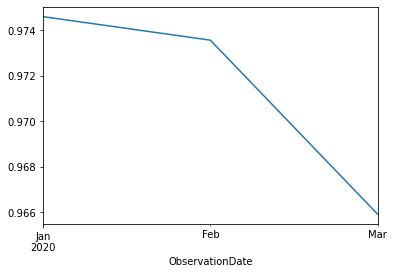

In [207]:
df_cvd_cum.groupby(pd.Grouper(key='ObservationDate',freq='m'))['rate'].mean().plot() #Los agrupo por mes y le saco el promedio

In [197]:
df_sr = df_cvd_cum.groupby(pd.Grouper(key='ObservationDate',freq='1d'))['rate'].mean() #Agrupo por día
df_sr.head(7)

ObservationDate
2020-01-22    0.970198
2020-01-23    0.972416
2020-01-24    0.971893
2020-01-25    0.971617
2020-01-26    0.973103
2020-01-27    0.973470
2020-01-28    0.977017
Freq: D, Name: rate, dtype: float64

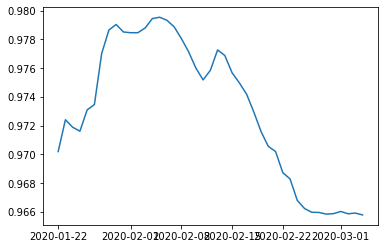

In [213]:
plt.plot(df_sr)
plt.show()

In [227]:
df_sr.rolling(window=7).mean().head(8) #La función rolling me permite tomar ventanas de datos, en este caso estoy tomando una ventana de 7 día y como vemos en el gráfico , la gráfica se suaviza

ObservationDate
2020-01-22         NaN
2020-01-23         NaN
2020-01-24         NaN
2020-01-25         NaN
2020-01-26         NaN
2020-01-27         NaN
2020-01-28    0.972816
2020-01-29    0.974025
Freq: D, Name: rate, dtype: float64

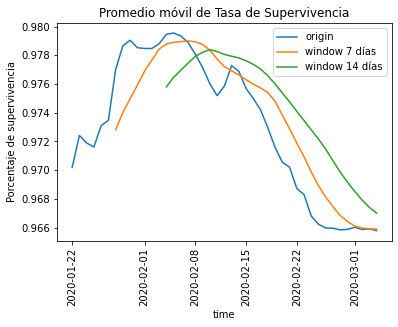

In [225]:
plt.plot(df_sr,label='origin')
plt.plot(df_sr.rolling(window=7).mean(),label='window 7 días')      
plt.plot(df_sr.rolling(window=14).mean(),label='window 14 días')     
plt.xticks(rotation=90)
plt.legend()
plt.title('Promedio móvil de Tasa de Supervivencia')
plt.xlabel('time')
plt.ylabel('Porcentaje de supervivencia',)
plt.show()

Quiero reponder la pregunta de cúal es el pais con más casos de covid19

In [230]:
df_cvd.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0


In [257]:
df_cvd.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False) #Agrupo por pais y saco el pais con mayores confirmados

Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Ivory Coast           1.0
Poland                1.0
Nigeria               1.0
Faroe Islands         1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

In [264]:
df_res = df_cvd.groupby(['Country/Region',pd.Grouper(key='ObservationDate',freq='1d')]).sum()
df_res

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

In [296]:
df_china = df_res.xs('Mainland China')
df_china.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0


<AxesSubplot:xlabel='ObservationDate'>

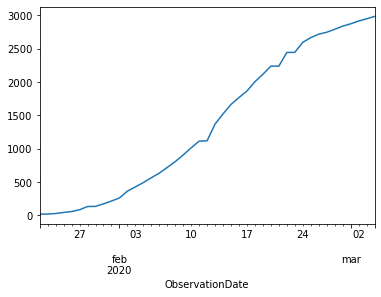

In [268]:
df_china['Deaths'].plot()

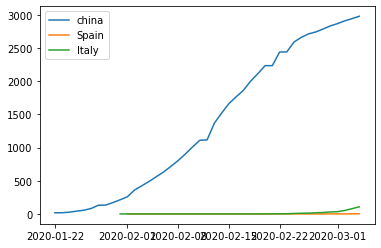

<Figure size 720x504 with 0 Axes>

In [312]:
plt.plot(df_china['Deaths'],label=('china'))
plt.plot(df_res.xs('Spain')['Deaths'],label=('Spain'))
plt.plot(df_res.xs('Italy')['Deaths'],label=('Italy'))
plt.legend()
plt.figure(figsize=(10,7))
plt.show()